In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
# vars = 'year', 'ï»¿trust_code', 'trust_code', 'trust_name', 'trust_type', 'site_code', 'site_name', 'site_type', 'Post Code',
#                   'area_total_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2',
#                   'consumed_electricity_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh' ,'consumed_green_kwh',
#                   'consumed_green_tariff_kwh', 'consumed_green_other_kwh',
#                  'water_total_m3', 'waste_incineration_tonnes', 'waste_alternative_tonnes', 'waste_landfill_tonnes', 'waste_recycling_tonnes']]

# import, harmonize raw files

In [4]:
df1011 = pd.read_csv('data/eric_11.csv', encoding = 'unicode_escape')
df1112 = pd.read_csv('data/eric_12.csv', encoding = 'unicode_escape')
df1213 = pd.read_csv('data/eric_13.csv', encoding = 'unicode_escape')
df1314 = pd.read_csv('data/eric_14.csv', encoding = 'unicode_escape')
df1415 = pd.read_csv('data/eric_15.csv', encoding = 'unicode_escape')
df1516 = pd.read_csv('data/eric_16.csv', encoding = 'unicode_escape')
df1617 = pd.read_csv('data/eric_17.csv', encoding = 'unicode_escape')
df1718 = pd.read_csv('data/eric_18.csv', encoding = 'unicode_escape')
df1819 = pd.read_csv('data/eric_19.csv', encoding = 'unicode_escape')
df1920 = pd.read_csv('data/eric_20.csv', encoding = 'unicode_escape')
df2021 = pd.read_csv('data/eric_21.csv', encoding = 'unicode_escape')

### df2010-2011

In [5]:
df1011.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 70 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   ï»¿Organisation Code                                                             1504 non-null   object
 1   Organisation Name                                                                1504 non-null   object
 2   Commissioning Region                                                             1504 non-null   object
 3   Organisation Type                                                                1504 non-null   object
 4   Site Code                                                                        1504 non-null   object
 5   Site Name                                                                        1504 non-null   object
 6   Site Type       

In [6]:
# 'consumed_electricity_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh' ,'consumed_green_kwh',
#                   'consumed_green_tariff_kwh', 'consumed_green_other_kwh',
#                  'water_total_m3', 'waste_incineration_tonnes', 'waste_alternative_tonnes', 'waste_landfill_tonnes', 'waste_recycling_tonnes']]

df1011 = df1011.rename(columns={'ï»¿Organisation Code': 'trust_code',
                       'Organisation Name': 'trust_name',
                       'Organisation Type': 'trust_type',
                       'Site Code': 'site_code',
                       'Site Name': 'site_name',
                       'Site Type': 'site_type',
                       #
                       'Occupied floor area (mÂ²)': 'area_occupied_m2',
                       'Site Heated Volume (mÂ³)': 'volume_heated_m3',
                       'Patient occupied floor area (mÂ²)':'area_patient_m2',
                       'Non-patient occupied floor area (mÂ²)':'area_nonpatient_m2',   
                       #
                       #total site energies used supplied by commercial supplier EXCLUDING RENEWABLE
                       'Electricity Consumed - Utility (kWh)':'consumed_electricity_supplier_kwh', 
                       'Gas Consumed - Utility (kWh)': 'consumed_gas_kwh', 
                       'Oil  Consumed - Utility (kWh)': 'consumed_oil_kwh',                       
                       'Coal Consumed - Utility (kWh)': 'consumed_coal_kwh',
                       #
                       #total site energies used supplied by NHS organisation (e.g. other site distribution) EXCLUDING RENEWABLE
                       'Electricity Consumed - Local (kWh)': 'consumed_electricity_local_kwh', 
                       #
                       #Total annual electrical energy supplied from renewable energy source, e.g. wind
                       'Electricity Consumed - Renewable (kWh)': 'consumed_electricity_green_kwh',
                       #
                       #Total annual fuel energy supplied from renewable energy source, e.g. biomass
                       'Non-fossil fuel Consumed - Renewable (kWh)': 'consumed_fuel_green_kwh',
                       #
                       'Water volume (including Borehole) (mÂ³)': 'water_total_m3', #all total water used by site
                       #
                       'High Temperature Disposal Waste Weight (Tonnes)':'waste_incineration_tonnes', #incineration/pyrolysis
                       'Non Burn Treatment (Alternative Treatment Plant) Disposal Waste Weight (Tonnes)': 'waste_alternative_tonnes', #heat/chemical/irradiation disinfection 
                       'Landfill Disposal Waste Weight (Tonnes)': 'waste_landfill_tonnes', #all non-hazardous/inert or asbestos waste                       
                       'Waste Electrical and Electronic Equipment (WEEE) Weight (Tonnes)': 'waste_eee_tonnes', #total weee disposal
                       'Waste recovery/recycling volume (%)': 'recycling_percent', #multiply this by total of other wastes to get raw recycling tonnage                          
                       })


In [7]:
numeric_1011 = ('area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2', 
                'consumed_electricity_supplier_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh',
                'consumed_electricity_local_kwh', 'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh',
                'water_total_m3', 
                'waste_incineration_tonnes', 'waste_alternative_tonnes', 'waste_eee_tonnes',
                'waste_landfill_tonnes', 'recycling_percent')

for var in numeric_1011:
    df1011[var] = pd.to_numeric(df1011[var], errors='coerce')

In [8]:
#df1011['waste_incineration_tonnes'] = pd.to_numeric(df1011['waste_incineration_tonnes'], errors='coerce')
#df1011['waste_alternative_tonnes'] = pd.to_numeric(df1011['waste_alternative_tonnes'], errors='coerce')
#df1011['waste_landfill_tonnes'] = pd.to_numeric(df1011['waste_landfill_tonnes'], errors='coerce')
#df1011['waste_eee_tonnes'] = pd.to_numeric(df1011['waste_eee_tonnes'], errors='coerce')
#df1011['recycling_percent'] = pd.to_numeric(df1011['recycling_percent'], errors='coerce')

In [9]:
#Per data dictionary, recycling % reflects additional amount of waste that is recycled relative other waste disposal methods

df1011['waste_recycling_tonnes'] = (df1011['waste_incineration_tonnes'] + df1011['waste_alternative_tonnes'] + df1011['waste_landfill_tonnes'])*(df1011['recycling_percent']/100)

In [10]:
df1011 = df1011[['trust_code', 'trust_name', 'trust_type', 'site_code', 'site_name', 'site_type', 
                'area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2',
                'consumed_electricity_supplier_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh', 'consumed_coal_kwh', 
                'consumed_electricity_local_kwh', 'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh', 'water_total_m3',
                'waste_incineration_tonnes', 'waste_alternative_tonnes', 'waste_landfill_tonnes',
                'waste_eee_tonnes', 'waste_recycling_tonnes'
                ]].copy()

In [11]:
df1011.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   trust_code                         1504 non-null   object 
 1   trust_name                         1504 non-null   object 
 2   trust_type                         1504 non-null   object 
 3   site_code                          1504 non-null   object 
 4   site_name                          1504 non-null   object 
 5   site_type                          1478 non-null   object 
 6   area_occupied_m2                   1502 non-null   float64
 7   volume_heated_m3                   1502 non-null   float64
 8   area_patient_m2                    1403 non-null   float64
 9   area_nonpatient_m2                 1403 non-null   float64
 10  consumed_electricity_supplier_kwh  1502 non-null   float64
 11  consumed_gas_kwh                   1502 non-null   float

### df2011-2012

In [12]:
df1112.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 70 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   ï»¿Organisation Code                                                             1676 non-null   object
 1   Organisation Name                                                                1676 non-null   object
 2   Commissioning Region                                                             1676 non-null   object
 3   Organisation Type                                                                1676 non-null   object
 4   Site Code                                                                        1676 non-null   object
 5   Site Name                                                                        1676 non-null   object
 6   Site Type       

In [13]:
# 'consumed_electricity_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh' ,'consumed_green_kwh',
#                   'consumed_green_tariff_kwh', 'consumed_green_other_kwh',
#                  'water_total_m3', 'waste_incineration_tonnes', 'waste_alternative_tonnes', 'waste_landfill_tonnes', 'waste_recycling_tonnes']]

df1112 = df1112.rename(columns={'ï»¿Organisation Code': 'trust_code',
                       'Organisation Name': 'trust_name',
                       'Organisation Type': 'trust_type',
                       'Site Code': 'site_code',
                       'Site Name': 'site_name',
                       'Site Type': 'site_type',
                       #
                       'Occupied floor area (mÂ²)': 'area_occupied_m2',
                       'Site Heated Volume (mÂ³)': 'volume_heated_m3',
                       'Patient occupied floor area (mÂ²)':'area_patient_m2',
                       'Non-patient occupied floor area (mÂ²)':'area_nonpatient_m2',   
                       #
                       #total site energies used supplied by commercial supplier EXCLUDING RENEWABLE
                       'Electricity Consumed - Utility (kWh)':'consumed_electricity_supplier_kwh', 
                       'Gas Consumed - Utility (kWh)': 'consumed_gas_kwh', 
                       'Oil Consumed - Utility (kWh)': 'consumed_oil_kwh',                       
                       'Coal Consumed - Utility (kWh)': 'consumed_coal_kwh',
                       #
                       #total site energies used supplied by NHS organisation (e.g. other site distribution) EXCLUDING RENEWABLE
                       'Electricity Consumed - Local (kWh)': 'consumed_electricity_local_kwh', 
                       #
                       #Total annual electrical energy supplied from renewable energy source, e.g. wind
                       'Electricity Consumed - Renewable (kWh)': 'consumed_electricity_green_kwh',
                       #
                       #Total annual fuel energy supplied from renewable energy source, e.g. biomass
                       'Non-fossil fuel Consumed - Renewable (kWh)': 'consumed_fuel_green_kwh',
                       #
                       'Water volume (including Borehole) (mÂ³)': 'water_total_m3', #all total water used by site
                       #
                       'High Temperature Disposal Waste Weight (Tonnes)':'waste_incineration_tonnes', #incineration/pyrolysis
                       'Non Burn Treatment (Alternative Treatment Plant) Disposal Waste Weight (Tonnes)': 'waste_alternative_tonnes', #heat/chemical/irradiation disinfection 
                       'Landfill Disposal Waste Weight (Tonnes)': 'waste_landfill_tonnes', #all non-hazardous/inert or asbestos waste                       
                       'Waste Electrical and Electronic Equipment (WEEE) Weight (Tonnes)': 'waste_eee_tonnes', #total weee disposal
                       'Waste recovery/recycling volume (Tonnes)': 'waste_recycling_tonnes', #from this year, direct figure given                          
                       })


In [14]:
numeric_1112 = ('area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2', 
                'consumed_electricity_supplier_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh',
                'consumed_electricity_local_kwh', 'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh',
                'water_total_m3', 
                'waste_incineration_tonnes', 'waste_alternative_tonnes', 'waste_eee_tonnes',
                'waste_landfill_tonnes', 'waste_recycling_tonnes')

for var in numeric_1112:
    df1112[var] = pd.to_numeric(df1112[var], errors='coerce')

In [15]:
df1112 = df1112[['trust_code', 'trust_name', 'trust_type', 'site_code', 'site_name', 'site_type', 
                'area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2',
                'consumed_electricity_supplier_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh', 'consumed_coal_kwh', 
                'consumed_electricity_local_kwh', 'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh', 'water_total_m3',
                'waste_incineration_tonnes', 'waste_alternative_tonnes', 'waste_landfill_tonnes',
                'waste_eee_tonnes', 'waste_recycling_tonnes'
                ]].copy()

In [16]:
df1112.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   trust_code                         1676 non-null   object 
 1   trust_name                         1676 non-null   object 
 2   trust_type                         1676 non-null   object 
 3   site_code                          1676 non-null   object 
 4   site_name                          1676 non-null   object 
 5   site_type                          1586 non-null   object 
 6   area_occupied_m2                   1673 non-null   float64
 7   volume_heated_m3                   1673 non-null   float64
 8   area_patient_m2                    1661 non-null   float64
 9   area_nonpatient_m2                 1673 non-null   float64
 10  consumed_electricity_supplier_kwh  1673 non-null   float64
 11  consumed_gas_kwh                   1673 non-null   float

### df2012-2013

In [17]:
df1213.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 76 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   ï»¿Organisation Code                                                             1591 non-null   object
 1   Organisation Name                                                                1591 non-null   object
 2   Commissioning Region                                                             1591 non-null   object
 3   Organisation Type                                                                1591 non-null   object
 4   Site Code                                                                        1591 non-null   object
 5   Site Name                                                                        1591 non-null   object
 6   Site Type       

In [18]:
df1213 = df1213.rename(columns={'ï»¿Organisation Code': 'trust_code',
                       'Organisation Name': 'trust_name',
                       'Organisation Type': 'trust_type',
                       'Site Code': 'site_code',
                       'Site Name': 'site_name',
                       'Site Type': 'site_type',
                       #
                       'Occupied floor area (mÂ²)': 'area_occupied_m2',
                       'Site Heated Volume (mÂ³)': 'volume_heated_m3',
                       'Patient occupied floor area (mÂ²)':'area_patient_m2',
                       'Non-patient occupied floor area (mÂ²)':'area_nonpatient_m2',   
                       #
                       #total site energies used supplied by commercial supplier EXCLUDING RENEWABLE
                       'Electricity Consumed - Utility (kWh)':'consumed_electricity_supplier_kwh', 
                       'Gas Consumed - Utility (kWh)': 'consumed_gas_kwh', 
                       'Oil Consumed - Utility (kWh)': 'consumed_oil_kwh',                       
                       'Coal Consumed - Utility (kWh)': 'consumed_coal_kwh',
                       #
                       #total site energies used supplied by NHS organisation (e.g. other site distribution) EXCLUDING RENEWABLE
                       'Electricity Consumed - Local (kWh)': 'consumed_electricity_local_kwh', 
                       #
                       #Total annual electrical energy supplied from renewable energy source, e.g. wind
                       'Electricity Consumed - Renewable (kWh)': 'consumed_electricity_green_kwh',
                       #
                       #Total annual fuel energy supplied from renewable energy source, e.g. biomass
                       'Non-fossil fuel Consumed - Renewable (kWh)': 'consumed_fuel_green_kwh',
                       #
                       'Water volume (including Borehole) (mÂ³)': 'water_total_m3', #all total water used by site
                       #
                       'High Temperature Disposal Waste Weight (Tonnes)':'waste_incineration_tonnes', #incineration/pyrolysis
                       'Non Burn Treatment (Alternative Treatment Plant) Disposal Waste Weight (Tonnes)': 'waste_alternative_tonnes', #heat/chemical/irradiation disinfection 
                       'Landfill Disposal Waste Weight (Tonnes)': 'waste_landfill_tonnes', #all non-hazardous/inert or asbestos waste                       
                       'Waste Electrical and Electronic Equipment (WEEE) Weight (Tonnes)': 'waste_eee_tonnes', #total weee disposal
                       'Waste recycling volume (Tonnes)': 'waste_recycling_tonnes', #from this year, direct figure given                          
                       })


In [19]:
numeric_1213 = ('area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2', 
                'consumed_electricity_supplier_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh',
                'consumed_electricity_local_kwh', 'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh',
                'water_total_m3', 
                'waste_incineration_tonnes', 'waste_alternative_tonnes', 'waste_eee_tonnes',
                'waste_landfill_tonnes', 'waste_recycling_tonnes')

for var in numeric_1213:
    df1213[var] = pd.to_numeric(df1213[var], errors='coerce')

In [20]:
df1213 = df1213[['trust_code', 'trust_name', 'trust_type', 'site_code', 'site_name', 'site_type', 
                'area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2',
                'consumed_electricity_supplier_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh', 'consumed_coal_kwh', 
                'consumed_electricity_local_kwh', 'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh', 'water_total_m3',
                'waste_incineration_tonnes', 'waste_alternative_tonnes', 'waste_landfill_tonnes',
                'waste_eee_tonnes', 'waste_recycling_tonnes'
                ]].copy()

In [21]:
df1213.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   trust_code                         1591 non-null   object 
 1   trust_name                         1591 non-null   object 
 2   trust_type                         1591 non-null   object 
 3   site_code                          1591 non-null   object 
 4   site_name                          1591 non-null   object 
 5   site_type                          1589 non-null   object 
 6   area_occupied_m2                   1586 non-null   float64
 7   volume_heated_m3                   1586 non-null   float64
 8   area_patient_m2                    1575 non-null   float64
 9   area_nonpatient_m2                 1586 non-null   float64
 10  consumed_electricity_supplier_kwh  1586 non-null   float64
 11  consumed_gas_kwh                   1586 non-null   float

### df2013-2014

In [22]:
df1314.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 76 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   ï»¿Organisation Code                                                             1378 non-null   object 
 1   Organisation Name                                                                1378 non-null   object 
 2   Commissioning Region                                                             1378 non-null   object 
 3   Organisation Type                                                                1378 non-null   object 
 4   Site Code                                                                        1378 non-null   object 
 5   Site Name                                                                        1378 non-null   object 
 6   Site Typ

In [23]:
df1314 = df1314.rename(columns={'ï»¿Organisation Code': 'trust_code',
                       'Organisation Name': 'trust_name',
                       'Organisation Type': 'trust_type',
                       'Site Code': 'site_code',
                       'Site Name': 'site_name',
                       'Site Type': 'site_type',
                       #
                       'Occupied floor area (mÂ²)': 'area_occupied_m2',
                       'Site heated volume (mÂ³)': 'volume_heated_m3',
                       'Patient occupied floor area (mÂ²)':'area_patient_m2',
                       'Non-patient occupied floor area (mÂ²)':'area_nonpatient_m2',   
                       #
                       #total site energies used supplied by commercial supplier EXCLUDING RENEWABLE
                       'Electricity consumed - utility (kWh)':'consumed_electricity_supplier_kwh', 
                       'Gas consumed - utility (kWh)': 'consumed_gas_kwh', 
                       'Oil consumed - utility (kWh)': 'consumed_oil_kwh',                       
                       'Coal consumed - utility (kWh)': 'consumed_coal_kwh',
                       #
                       #total site energies used supplied by NHS organisation (e.g. other site distribution) EXCLUDING RENEWABLE
                       'Electricity consumed - local (kWh)': 'consumed_electricity_local_kwh', 
                       #
                       #Total annual electrical energy supplied from renewable energy source, e.g. wind
                       'Electricity consumed - renewable (kWh)': 'consumed_electricity_green_kwh',
                       #
                       #Total annual fuel energy supplied from renewable energy source, e.g. biomass
                       'Non-fossil fuel consumed - renewable (kWh)': 'consumed_fuel_green_kwh',
                       #
                       'Water volume (including borehole) (mÂ³)': 'water_total_m3', #all total water used by site
                       #
                       'High temperature disposal waste weight (Tonnes)':'waste_incineration_tonnes', #incineration/pyrolysis
                       'Non burn treatment (alternative treatment plant) disposal waste weight (Tonnes)': 'waste_alternative_tonnes', #heat/chemical/irradiation disinfection 
                       'Landfill disposal waste weight (Tonnes)': 'waste_landfill_tonnes', #all non-hazardous/inert or asbestos waste                       
                       'Waste electrical and electronic equipment (WEEE) weight (Tonnes)': 'waste_eee_tonnes', #total weee disposal
                       'Waste recycling volume (Tonnes)': 'waste_recycling_tonnes', #from this year, direct figure given                          
                       })


In [24]:
numeric_1314 = ('area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2', 
                'consumed_electricity_supplier_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh',
                'consumed_electricity_local_kwh', 'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh',
                'water_total_m3', 
                'waste_incineration_tonnes', 'waste_alternative_tonnes', 'waste_eee_tonnes',
                'waste_landfill_tonnes', 'waste_recycling_tonnes')

for var in numeric_1314:
    df1314[var] = pd.to_numeric(df1314[var], errors='coerce')

In [25]:
df1314 = df1314[['trust_code', 'trust_name', 'trust_type', 'site_code', 'site_name', 'site_type', 
                'area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2',
                'consumed_electricity_supplier_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh', 'consumed_coal_kwh', 
                'consumed_electricity_local_kwh', 'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh', 'water_total_m3',
                'waste_incineration_tonnes', 'waste_alternative_tonnes', 'waste_landfill_tonnes',
                'waste_eee_tonnes', 'waste_recycling_tonnes'
                ]].copy()

In [26]:
df1314.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   trust_code                         1378 non-null   object 
 1   trust_name                         1378 non-null   object 
 2   trust_type                         1378 non-null   object 
 3   site_code                          1378 non-null   object 
 4   site_name                          1378 non-null   object 
 5   site_type                          1376 non-null   object 
 6   area_occupied_m2                   1378 non-null   float64
 7   volume_heated_m3                   1378 non-null   float64
 8   area_patient_m2                    1368 non-null   float64
 9   area_nonpatient_m2                 1378 non-null   float64
 10  consumed_electricity_supplier_kwh  1378 non-null   float64
 11  consumed_gas_kwh                   1378 non-null   float

### df2014-2015

In [27]:
df1415.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 104 columns):
 #    Column                                                                                     Non-Null Count  Dtype  
---   ------                                                                                     --------------  -----  
 0    Organisation Code                                                                          1251 non-null   object 
 1    Organisation Name                                                                          1251 non-null   object 
 2    Commissioning Region                                                                       1251 non-null   object 
 3    Organisation Type                                                                          1251 non-null   object 
 4    Site Code                                                                                  1251 non-null   object 
 5    Site Name                              

In [28]:
df1415 = df1415.rename(columns={'Organisation Code': 'trust_code',
                       'Organisation Name': 'trust_name',
                       'Organisation Type': 'trust_type',
                       'Site Code': 'site_code',
                       'Site Name': 'site_name',
                       'Site Type': 'site_type',
                       #
                       'Occupied floor area (m²)': 'area_occupied_m2',
                       'Site heated volume (m³)': 'volume_heated_m3',
                       'Patient occupied floor area (m²)':'area_patient_m2',
                       'Non-patient occupied floor area (m²)':'area_nonpatient_m2',   
                       #
                       #total site energies used supplied by commercial supplier EXCLUDING RENEWABLE
                       'Electricity consumed - utility (kWh)':'consumed_electricity_supplier_kwh', 
                       'Gas consumed - utility (kWh)': 'consumed_gas_kwh', 
                       'Oil  consumed - utility (kWh)': 'consumed_oil_kwh',                       
                       'Coal consumed - utility (kWh)': 'consumed_coal_kwh',
                       #
                       #total site energies used supplied by NHS organisation (e.g. other site distribution) EXCLUDING RENEWABLE
                       'Electricity consumed - local (kWh)': 'consumed_electricity_local_kwh', 
                       #
                       #Total annual electrical energy supplied from renewable energy source, e.g. wind
                       'Electricity consumed - renewable (kWh)': 'consumed_electricity_green_kwh',
                       #
                       #Total annual fuel energy supplied from renewable energy source, e.g. biomass
                       'Non-fossil fuel consumed - renewable (kWh)': 'consumed_fuel_green_kwh',
                       #
                       'Water volume (including borehole) (m³)': 'water_total_m3', #all total water used by site
                       #
                       'High temperature disposal waste weight (Tonnes)':'waste_incineration_tonnes', #incineration/pyrolysis
                       'Non burn treatment (alternative treatment plant) disposal waste weight (Tonnes)': 'waste_alternative_tonnes', #heat/chemical/irradiation disinfection 
                       'Landfill disposal waste weight (Tonnes)': 'waste_landfill_tonnes', #all non-hazardous/inert or asbestos waste                       
                       'Waste electrical and electronic equipment (WEEE) weight (Tonnes)': 'waste_eee_tonnes', #total weee disposal
                       'Waste recycling volume (Tonnes)': 'waste_recycling_tonnes', #from this year, direct figure given                          
                       })


In [29]:
##convert float
numeric_1415 = ('area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2', 
                'consumed_electricity_supplier_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh',
                'consumed_electricity_local_kwh', 'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh',
                'water_total_m3', 
                'waste_incineration_tonnes', 'waste_alternative_tonnes', 'waste_eee_tonnes',
                'waste_landfill_tonnes', 'waste_recycling_tonnes')

for var in numeric_1415:
    df1415[var] = pd.to_numeric(df1415[var], errors='coerce')

In [30]:
df1415 = df1415[['trust_code', 'trust_name', 'trust_type', 'site_code', 'site_name', 'site_type', 
                'area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2',
                'consumed_electricity_supplier_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh', 'consumed_coal_kwh', 
                'consumed_electricity_local_kwh', 'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh', 'water_total_m3',
                'waste_incineration_tonnes', 'waste_alternative_tonnes', 'waste_landfill_tonnes',
                'waste_eee_tonnes', 'waste_recycling_tonnes'
                ]].copy()

df1415.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   trust_code                         1251 non-null   object 
 1   trust_name                         1251 non-null   object 
 2   trust_type                         1251 non-null   object 
 3   site_code                          1251 non-null   object 
 4   site_name                          1251 non-null   object 
 5   site_type                          1251 non-null   object 
 6   area_occupied_m2                   1251 non-null   float64
 7   volume_heated_m3                   1251 non-null   float64
 8   area_patient_m2                    1241 non-null   float64
 9   area_nonpatient_m2                 1251 non-null   float64
 10  consumed_electricity_supplier_kwh  1251 non-null   float64
 11  consumed_gas_kwh                   1251 non-null   float

### df2015-2016

In [31]:
df1516.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 112 columns):
 #    Column                                                                                                                                                                       Non-Null Count  Dtype  
---   ------                                                                                                                                                                       --------------  -----  
 0    Organisation Code                                                                                                                                                            1214 non-null   object 
 1    Organisation Name                                                                                                                                                            1214 non-null   object 
 2    Commissioning Region                                                      

In [32]:
df1516 = df1516.rename(columns={'Organisation Code': 'trust_code',
                       'Organisation Name': 'trust_name',
                       'Organisation Type': 'trust_type',
                       'Site Code': 'site_code',
                       'Site Name': 'site_name',
                       'Site Type': 'site_type',
                       #
                       'Occupied floor area (m²)': 'area_occupied_m2', 
                       'Site heated volume (m³)': 'volume_heated_m3',
                       #
                       ##name changed, but definitions consistent -> clinical = 'patient & visitor accessible'
                       'Clinical space (m²)':'area_patient_m2',
                       'Non-clinical space (m²)':'area_nonpatient_m2',   
                       #
                       #total site energies used supplied by commercial supplier EXCLUDING RENEWABLE
                       #note changes -> electricity consumed is now supplier + local
                       'Electricity consumed (kWh)':'consumed_electricity_total_kwh',
                       'Gas consumed (kWh)': 'consumed_gas_kwh', 
                       'Oil  consumed (kWh)': 'consumed_oil_kwh',                       
                       'Coal consumed (kWh)': 'consumed_coal_kwh',
                       #
                       #Total annual electrical energy supplied from renewable energy source, e.g. wind
                       'Electricity consumed - renewable (kWh)': 'consumed_electricity_green_kwh',
                       #
                       #Total annual fuel energy supplied from renewable energy source, e.g. biomass
                       'Non-fossil fuel consumed - renewable (kWh)': 'consumed_fuel_green_kwh',
                       #
                       'Water volume (including borehole) (m³)': 'water_total_m3', #all total water used by site
                       #
                       #Waste definitions entirely changed this year by waste type and not by disposal method. 
                       #Unable to quantify or compare.     
                       })


In [33]:
##convert float
numeric_1516 = ('area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2', 
                'consumed_electricity_total_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh',
                'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh',
                'water_total_m3')

for var in numeric_1516:
    df1516[var] = pd.to_numeric(df1516[var], errors='coerce')

In [34]:
df1516 = df1516[['trust_code', 'trust_name', 'trust_type', 'site_code', 'site_name', 'site_type', 
                'area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2',
                'consumed_electricity_total_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh', 'consumed_coal_kwh', 
                'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh', 'water_total_m3',
                ]].copy()

df1516.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trust_code                      1214 non-null   object 
 1   trust_name                      1214 non-null   object 
 2   trust_type                      1214 non-null   object 
 3   site_code                       1214 non-null   object 
 4   site_name                       1214 non-null   object 
 5   site_type                       1214 non-null   object 
 6   area_occupied_m2                1214 non-null   float64
 7   volume_heated_m3                1214 non-null   float64
 8   area_patient_m2                 1204 non-null   float64
 9   area_nonpatient_m2              1204 non-null   float64
 10  consumed_electricity_total_kwh  1076 non-null   float64
 11  consumed_gas_kwh                1076 non-null   float64
 12  consumed_oil_kwh                10

### df2016-2017

In [35]:
df1617.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 128 columns):
 #    Column                                                                                                                                                                       Non-Null Count  Dtype  
---   ------                                                                                                                                                                       --------------  -----  
 0    Trust Code                                                                                                                                                                   1213 non-null   object 
 1    Trust Name                                                                                                                                                                   1213 non-null   object 
 2    Commissioning Region                                                      

In [36]:
df1617 = df1617.rename(columns={'Trust Code': 'trust_code',
                       'Trust Name': 'trust_name',
                       'Trust Type': 'trust_type',
                       'Site Code': 'site_code',
                       'Site Name': 'site_name',
                       'Site Type': 'site_type',
                       #
                       'Occupied floor area (m²)': 'area_occupied_m2',
                       'Site heated volume (m³)': 'volume_heated_m3',
                       'Clinical space (m²)':'area_patient_m2',
                       'Non-clinical space (m²)':'area_nonpatient_m2',   
                       #
                       #total site energies used supplied by commercial supplier EXCLUDING RENEWABLE
                       #note changes -> electricity consumed is now supplier + local                                
                       'Electricity consumed (kWh)':'consumed_electricity_total_kwh', 
                       'Gas consumed (kWh)': 'consumed_gas_kwh', 
                       'Oil consumed (kWh)': 'consumed_oil_kwh',                       
                       'Coal consumed (kWh)': 'consumed_coal_kwh',
                       #
                       #renewable energy from supplier
                       'Electricity consumed - green energy tariff (kWh)': 'consumed_electricity_green_tariff_kwh', 
                       #
                       #renewable energy from non-supplier tariff (e.g. 3rd party wind generator)
                       'Electricity consumed - third party owned renewable (kWh)': 'consumed_electricity_green_add_kwh',
                       #
                       #Total annual fuel energy supplied from renewable energy source, e.g. biomass
                       'Non-fossil fuel consumed - renewable (kWh)': 'consumed_fuel_green_kwh',
                       #
                       'Water volume (including borehole) (m³)': 'water_total_m3', #all total water used by site
                       #
                       #Electronic waste not reported this year
                       'Incineration disposal volume (Tonnes)':'waste_incineration_tonnes', #incineration/pyrolysis
                       'Other recovery volume (Tonnes)': 'waste_alternative_tonnes', #heat/chemical/irradiation disinfection 
                       'Landfill disposal volume (Tonnes)': 'waste_landfill_tonnes', #all non-hazardous/inert or asbestos waste                       
                       'Waste reycling volume (Tonnes)': 'waste_recycling_tonnes', #from this year, direct figure given                          
                       })


In [37]:
##convert float
numeric_1617 = ('area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2', 
                'consumed_electricity_total_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh',
                'consumed_electricity_green_tariff_kwh', 'consumed_electricity_green_add_kwh', 'consumed_fuel_green_kwh',
                'water_total_m3', 
                'waste_incineration_tonnes', 'waste_alternative_tonnes',
                'waste_landfill_tonnes', 'waste_recycling_tonnes')

for var in numeric_1617:
    df1617[var] = pd.to_numeric(df1617[var], errors='coerce')

In [38]:
df1617['consumed_electricity_green_kwh'] = df1617['consumed_electricity_green_tariff_kwh'] + df1617['consumed_electricity_green_add_kwh']

In [39]:
df1617 = df1617[['trust_code', 'trust_name', 'trust_type', 'site_code', 'site_name', 'site_type', 
                'area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2', 
                'consumed_electricity_total_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh',
                'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh',
                'water_total_m3', 
                'waste_incineration_tonnes', 'waste_alternative_tonnes',
                'waste_landfill_tonnes', 'waste_recycling_tonnes'
                ]].copy()

df1617.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trust_code                      1213 non-null   object 
 1   trust_name                      1213 non-null   object 
 2   trust_type                      1213 non-null   object 
 3   site_code                       1213 non-null   object 
 4   site_name                       1213 non-null   object 
 5   site_type                       1213 non-null   object 
 6   area_occupied_m2                1213 non-null   float64
 7   volume_heated_m3                1213 non-null   float64
 8   area_patient_m2                 1203 non-null   float64
 9   area_nonpatient_m2              1203 non-null   float64
 10  consumed_electricity_total_kwh  1077 non-null   float64
 11  consumed_gas_kwh                1077 non-null   float64
 12  consumed_oil_kwh                10

### df2017-2018

In [40]:
df1718.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 98 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Trust Code                                                                  1159 non-null   object 
 1   Trust Name                                                                  1159 non-null   object 
 2   Commissioning Region                                                        1159 non-null   object 
 3   Trust Type                                                                  1159 non-null   object 
 4   Site Code                                                                   1159 non-null   object 
 5   Site Name                                                                   1159 non-null   object 
 6   Site Type                                       

In [41]:
df1718 = df1718.rename(columns={'Trust Code': 'trust_code',
                       'Trust Name': 'trust_name',
                       'Trust Type': 'trust_type',
                       'Site Code': 'site_code',
                       'Site Name': 'site_name',
                       'Site Type': 'site_type',
                       #
                       'Occupied floor area (m²)': 'area_occupied_m2',
                       'Site heated volume (m³)': 'volume_heated_m3',
                       'Clinical space (m²)':'area_patient_m2',
                       'Non-clinical space (m²)':'area_nonpatient_m2',   
                       #
                       #total site energies used supplied by commercial supplier EXCLUDING RENEWABLE
                       #note changes -> electricity consumed is now supplier + local                                
                       'Electricity consumed (kWh)':'consumed_electricity_total_kwh', 
                       'Gas consumed (kWh)': 'consumed_gas_kwh', 
                       'Oil consumed (kWh)': 'consumed_oil_kwh',                       
                       'Coal consumed (kWh)': 'consumed_coal_kwh',
                       #
                       #renewable energy from supplier
                       'Electricity consumed - green energy tariff (kWh)': 'consumed_electricity_green_tariff_kwh', 
                       #
                       #renewable energy from non-supplier tariff (e.g. 3rd party wind generator)
                       'Electricity consumed - third party owned renewable (kWh)': 'consumed_electricity_green_add_kwh',
                       #
                       #renewable energy produced on-site (exclude from consumption numbers)
                       'Electrical energy output of owned onsite renewables (kWh)': 'produced_electricity_green_kwh',
                       #         
                       #Total annual fuel energy supplied from renewable energy source, e.g. biomass
                       'Non-fossil fuel consumed - renewable (kWh)': 'consumed_fuel_green_kwh',
                       #
                       'Water volume (including borehole) (m³)': 'water_total_m3', #all total water used by site
                       #
                       #Electronic waste not reported this year
                       'Incineration disposal volume (Tonnes)':'waste_incineration_tonnes', #incineration/pyrolysis
                       'Other recovery volume (Tonnes)': 'waste_alternative_tonnes', #heat/chemical/irradiation disinfection 
                       'Landfill disposal volume (Tonnes)': 'waste_landfill_tonnes', #all non-hazardous/inert or asbestos waste                       
                       'Waste reycling volume (Tonnes)': 'waste_recycling_tonnes', #from this year, direct figure given                          
                       })


In [42]:
##convert float
numeric_1718 = ('area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2', 
                'consumed_electricity_total_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh',
                'consumed_electricity_green_tariff_kwh', 'consumed_electricity_green_add_kwh', 'consumed_fuel_green_kwh',
                'produced_electricity_green_kwh', 'water_total_m3', 
                'waste_incineration_tonnes', 'waste_alternative_tonnes',
                'waste_landfill_tonnes', 'waste_recycling_tonnes')

for var in numeric_1718:
    df1718[var] = pd.to_numeric(df1718[var], errors='coerce')

In [43]:
df1718['consumed_electricity_green_kwh'] = df1718['consumed_electricity_green_tariff_kwh'] + df1718['consumed_electricity_green_add_kwh']

In [44]:
df1718 = df1718[['trust_code', 'trust_name', 'trust_type', 'site_code', 'site_name', 'site_type', 
                'area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2', 
                'consumed_electricity_total_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh',
                'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh', 'produced_electricity_green_kwh',
                'water_total_m3', 
                'waste_incineration_tonnes', 'waste_alternative_tonnes',
                'waste_landfill_tonnes', 'waste_recycling_tonnes'
                ]].copy()

df1718.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trust_code                      1159 non-null   object 
 1   trust_name                      1159 non-null   object 
 2   trust_type                      1159 non-null   object 
 3   site_code                       1159 non-null   object 
 4   site_name                       1159 non-null   object 
 5   site_type                       1159 non-null   object 
 6   area_occupied_m2                1159 non-null   float64
 7   volume_heated_m3                1159 non-null   float64
 8   area_patient_m2                 1148 non-null   float64
 9   area_nonpatient_m2              1148 non-null   float64
 10  consumed_electricity_total_kwh  1003 non-null   float64
 11  consumed_gas_kwh                1003 non-null   float64
 12  consumed_oil_kwh                10

### df2018-2019

In [45]:
df1819.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 124 columns):
 #    Column                                                          Non-Null Count  Dtype  
---   ------                                                          --------------  -----  
 0    Trust Code                                                      1138 non-null   object 
 1    Trust Name                                                      1138 non-null   object 
 2    Old Commissioning Region                                        1138 non-null   object 
 3    New Commissioning Region                                        1138 non-null   object 
 4    Trust Type                                                      1138 non-null   object 
 5    Site Code                                                       1138 non-null   object 
 6    Site Name                                                       1138 non-null   object 
 7    Site Type                               

In [46]:
df1819 = df1819.rename(columns={'Trust Code': 'trust_code',
                       'Trust Name': 'trust_name',
                       'Trust Type': 'trust_type',
                       'Site Code': 'site_code',
                       'Site Name': 'site_name',
                       'Site Type': 'site_type',
                       #
                       'Occupied floor area (m²)': 'area_occupied_m2',
                       'Site heated volume (m³)': 'volume_heated_m3',
                       'Clinical space (m²)':'area_patient_m2',
                       'Non-clinical space (m²)':'area_nonpatient_m2',   
                       #
                       #total site energies used supplied by commercial supplier EXCLUDING RENEWABLE
                       #note changes -> electricity consumed is now supplier + local                                
                       'Electricity consumed (kWh)':'consumed_electricity_total_kwh', 
                       'Gas consumed (kWh)': 'consumed_gas_kwh', 
                       'Oil consumed (kWh)': 'consumed_oil_kwh',                       
                       'Coal consumed (kWh)': 'consumed_coal_kwh',
                       #
                       #renewable energy from supplier
                       'Electricity consumed - green energy tariff (kWh)': 'consumed_electricity_green_tariff_kwh', 
                       #
                       #renewable energy from non-supplier tariff (e.g. 3rd party wind generator)
                       'Electricity consumed - third party owned renewable (kWh)': 'consumed_electricity_green_add_kwh',
                       #
                       #renewable energy produced on-site (exclude from consumption numbers)
                       'Electrical energy output of owned onsite renewables (kWh)': 'produced_electricity_green_kwh',
                       #         
                       #Total annual fuel energy supplied from renewable energy source, e.g. biomass
                       'Non-fossil fuel consumed - renewable (kWh)': 'consumed_fuel_green_kwh',
                       #
                       'Water volume (including borehole) (m³)': 'water_total_m3', #all total water used by site
                       #
                       #Waste reckoning has had complete overhaul...
                       'Incineration (clinical waste) volume (Tonnes)':'waste_clinical_incineration_tonnes', #incineration/pyrolysis
                       'Alternative Treatment (clinical waste) volume (Tonnes)': 'waste_alternative_tonnes', #heat/chemical/irradiation disinfection 
                       'Domestic waste (landfill) volume (Tonnes)': 'waste_landfill_tonnes', #                     
                       'Domestic waste (recycling) volume (Tonnes)': 'waste_recycling_tonnes', #                          
                       'Domestic waste (incineration) volume (Tonnes)': 'waste_domestic_incineration_tonnes', #
                       'WEEE waste volume (Tonnes)': 'waste_eee_tonnes',
                       'Clinical waste processed on site volume (Tonnes)': 'waste_clinical_site_tonnes', #unclear what qualifies as 'on site'
                       'Domestic waste processed on site volume (Tonnes)': 'waste_domestic_site_tonnes',
                        })

In [47]:
##convert float
numeric_1819 = ('area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2', 
                'consumed_electricity_total_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh',
                'consumed_electricity_green_tariff_kwh', 'consumed_electricity_green_add_kwh', 'consumed_fuel_green_kwh',
                'produced_electricity_green_kwh', 'water_total_m3', 
                'waste_clinical_incineration_tonnes', 'waste_alternative_tonnes', 'waste_domestic_incineration_tonnes',
                'waste_landfill_tonnes', 'waste_recycling_tonnes', 'waste_eee_tonnes',
                'waste_clinical_site_tonnes', 'waste_domestic_site_tonnes')

for var in numeric_1819:
    df1819[var] = pd.to_numeric(df1819[var], errors='coerce')

In [48]:
df1819['consumed_electricity_green_kwh'] = df1819['consumed_electricity_green_tariff_kwh'] + df1819['consumed_electricity_green_add_kwh']

df1819['waste_incineration_tonnes'] = df1819['waste_clinical_incineration_tonnes'] + df1819['waste_domestic_incineration_tonnes']

df1819['waste_onsite_tonnes'] = df1819['waste_clinical_site_tonnes'] + df1819['waste_domestic_site_tonnes']

In [49]:
df1819 = df1819[['trust_code', 'trust_name', 'trust_type', 'site_code', 'site_name', 'site_type', 
                'area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2', 
                'consumed_electricity_total_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh',
                'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh', 'produced_electricity_green_kwh',
                'water_total_m3', 
                'waste_incineration_tonnes', 'waste_alternative_tonnes',
                'waste_landfill_tonnes', 'waste_recycling_tonnes', 'waste_eee_tonnes', 'waste_onsite_tonnes'
                ]].copy()

df1819.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trust_code                      1138 non-null   object 
 1   trust_name                      1138 non-null   object 
 2   trust_type                      1138 non-null   object 
 3   site_code                       1138 non-null   object 
 4   site_name                       1138 non-null   object 
 5   site_type                       1138 non-null   object 
 6   area_occupied_m2                1138 non-null   float64
 7   volume_heated_m3                1138 non-null   float64
 8   area_patient_m2                 1128 non-null   float64
 9   area_nonpatient_m2              1128 non-null   float64
 10  consumed_electricity_total_kwh  999 non-null    float64
 11  consumed_gas_kwh                999 non-null    float64
 12  consumed_oil_kwh                99

### df2019-2020

In [50]:
df1920.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 165 columns):
 #    Column                                                                      Non-Null Count  Dtype  
---   ------                                                                      --------------  -----  
 0    Trust Code                                                                  1261 non-null   object 
 1    Trust Name                                                                  1261 non-null   object 
 2    Commissioning Region                                                        1261 non-null   object 
 3    Trust Type                                                                  1261 non-null   object 
 4    Site Code                                                                   1261 non-null   object 
 5    Site Name                                                                   1261 non-null   object 
 6    Site Type                             

In [51]:
df1920 = df1920.rename(columns={'Trust Code': 'trust_code',
                       'Trust Name': 'trust_name',
                       'Trust Type': 'trust_type',
                       'Site Code': 'site_code',
                       'Site Name': 'site_name',
                       'Site Type': 'site_type',
                       #
                       #space accountings are changed so must now sum for patient/non-patient
                       'Gross internal floor area (m²)': 'area_total_m2',
                       'NHS estate occupied floor area (%)': 'area_occupied_%',        
                       'Site heated volume (m³)': 'volume_heated_m3',
                       #
                       'Private patient (m²)': 'area_patient_private_m2',
                       'Pathology (m²)': 'area_patient_pathology_m2',  
                       'Clinical Sterile Services Dept. (CSSD) (m²)': 'area_patient_cssd_m2',                                
                       'Clinical space - other (m²)':'area_patient_other_m2',
                       #
                       'Medical records (m²)':'area_nonpatient_records_m2',               
                       'Human Resources (m²)':'area_nonpatient_hr_m2',             
                       'Information Technology (m²)':'area_nonpatient_it_m2',               
                       'General Administration (m²)':'area_nonpatient_admin_m2',     
                       'Restaurants (m²)':'area_nonpatient_food_m2',               
                       'Staff Accommodation (m²)':'area_nonpatient_accom_m2',   
                       'Non-clinical space - other (m²)':'area_nonpatient_other_m2',   
                       #
                       #total site energies used supplied by commercial supplier EXCLUDING RENEWABLE
                       #note changes -> electricity consumed is now supplier + local                                
                       'Electricity consumed (kWh)':'consumed_electricity_total_kwh', 
                       'Gas consumed (kWh)': 'consumed_gas_kwh', 
                       'Oil consumed (kWh)': 'consumed_oil_kwh',                       
                       'Coal consumed (kWh)': 'consumed_coal_kwh',
                       #
                       #renewable energy from supplier
                       'Electricity consumed - green energy tariff (kWh)': 'consumed_electricity_green_tariff_kwh', 
                       #
                       #renewable energy from non-supplier tariff (e.g. 3rd party wind generator)
                       'Electricity consumed - third party owned renewable (kWh)': 'consumed_electricity_green_add_kwh',
                       #
                       #renewable energy produced on-site (exclude from consumption numbers)
                       'Electrical energy output of owned onsite renewables (kWh)': 'produced_electricity_green_kwh',
                       #         
                       #Total annual fuel energy supplied from renewable energy source, e.g. biomass
                       'Non-fossil fuel consumed - renewable (kWh)': 'consumed_fuel_green_kwh',
                       #
                       'Water volume (including borehole) (m³)': 'water_total_m3', #all total water used by site
                       #
                       #
                       'Incineration (clinical waste) volume (Tonnes)':'waste_clinical_incineration_tonnes', #incineration/pyrolysis
                       'Alternative Treatment (clinical waste) volume (Tonnes)': 'waste_alternative_tonnes', #heat/chemical/irradiation disinfection 
                       'Domestic waste (landfill) volume (Tonnes)': 'waste_landfill_tonnes', #                     
                       'Domestic waste (recycling) volume (Tonnes)': 'waste_recycling_tonnes', #                          
                       'Domestic waste (incineration) volume (Tonnes)': 'waste_domestic_incineration_tonnes', #
                       'Clinical waste processed on site volume (Tonnes)': 'waste_clinical_site_tonnes', #unclear what qualifies as 'on site'
                       'Domestic waste processed on site volume (Tonnes)': 'waste_domestic_site_tonnes',
                        })

In [52]:
##convert float
numeric_1920 = ('area_total_m2', 'area_occupied_%', 'volume_heated_m3',
                'area_patient_private_m2', 'area_patient_pathology_m2', 'area_patient_cssd_m2', 'area_patient_other_m2',
                'area_nonpatient_records_m2', 'area_nonpatient_hr_m2', 'area_nonpatient_it_m2', 'area_nonpatient_admin_m2',
                'area_nonpatient_food_m2', 'area_nonpatient_accom_m2', 'area_nonpatient_other_m2',
                'consumed_electricity_total_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh',
                'consumed_electricity_green_tariff_kwh', 'consumed_electricity_green_add_kwh', 'consumed_fuel_green_kwh',
                'produced_electricity_green_kwh', 'water_total_m3', 
                'waste_clinical_incineration_tonnes', 'waste_alternative_tonnes', 'waste_domestic_incineration_tonnes',
                'waste_landfill_tonnes', 'waste_recycling_tonnes',
                'waste_clinical_site_tonnes', 'waste_domestic_site_tonnes')

for var in numeric_1920:
    df1920[var] = pd.to_numeric(df1920[var], errors='coerce')

In [53]:
df1920['area_occupied_m2'] = df1920['area_total_m2'] * (df1920['area_occupied_%']/100)

In [54]:
df1920['area_patient_m2'] = df1920['area_patient_private_m2'] + df1920['area_patient_pathology_m2'] + df1920['area_patient_cssd_m2'] + df1920['area_patient_other_m2']
    
df1920['area_nonpatient_m2'] = df1920['area_nonpatient_records_m2'] + df1920['area_nonpatient_hr_m2'] + df1920['area_nonpatient_it_m2'] + df1920['area_nonpatient_admin_m2'] + df1920['area_nonpatient_food_m2'] + df1920['area_nonpatient_accom_m2'] + df1920['area_nonpatient_other_m2']    

In [55]:
df1920['consumed_electricity_green_kwh'] = df1920['consumed_electricity_green_tariff_kwh'] + df1920['consumed_electricity_green_add_kwh']

df1920['waste_incineration_tonnes'] = df1920['waste_clinical_incineration_tonnes'] + df1920['waste_domestic_incineration_tonnes']

df1920['waste_onsite_tonnes'] = df1920['waste_clinical_site_tonnes'] + df1920['waste_domestic_site_tonnes']

In [56]:
df1920 = df1920[['trust_code', 'trust_name', 'trust_type', 'site_code', 'site_name', 'site_type', 
                'area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2', 
                'consumed_electricity_total_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh',
                'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh', 'produced_electricity_green_kwh',
                'water_total_m3', 
                'waste_incineration_tonnes', 'waste_alternative_tonnes',
                'waste_landfill_tonnes', 'waste_recycling_tonnes', 'waste_onsite_tonnes'
                ]].copy()

df1920.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trust_code                      1261 non-null   object 
 1   trust_name                      1261 non-null   object 
 2   trust_type                      1261 non-null   object 
 3   site_code                       1261 non-null   object 
 4   site_name                       1261 non-null   object 
 5   site_type                       1261 non-null   object 
 6   area_occupied_m2                1261 non-null   float64
 7   volume_heated_m3                1261 non-null   float64
 8   area_patient_m2                 1122 non-null   float64
 9   area_nonpatient_m2              1122 non-null   float64
 10  consumed_electricity_total_kwh  1124 non-null   float64
 11  consumed_gas_kwh                1124 non-null   float64
 12  consumed_oil_kwh                11

### df2020-2021

In [57]:
df2021.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 172 columns):
 #    Column                                                                      Non-Null Count  Dtype  
---   ------                                                                      --------------  -----  
 0    Trust Code                                                                  1235 non-null   object 
 1    Trust Name                                                                  1235 non-null   object 
 2    Commissioning Region                                                        1235 non-null   object 
 3    Trust Type                                                                  1235 non-null   object 
 4    Site Code                                                                   1235 non-null   object 
 5    Site Name                                                                   1235 non-null   object 
 6    Site Type                             

In [58]:
df2021 = df2021.rename(columns={'Trust Code': 'trust_code',
                       'Trust Name': 'trust_name',
                       'Trust Type': 'trust_type',
                       'Site Code': 'site_code',
                       'Site Name': 'site_name',
                       'Site Type': 'site_type',
                       #
                       #space accountings are changed so must now sum for patient/non-patient
                       'Gross internal floor area (m²)': 'area_total_m2',
                       'NHS estate occupied floor area (%)': 'area_occupied_%',        
                       'Site heated volume (m³)': 'volume_heated_m3',
                       #
                       'Private patient (m²)': 'area_patient_private_m2',
                       'Pathology (m²)': 'area_patient_pathology_m2',  
                       'Clinical Sterile Services Dept. (CSSD) (m²)': 'area_patient_cssd_m2',                                
                       'Clinical space - other (m²)':'area_patient_other_m2',
                       #
                       'Medical records (m²)':'area_nonpatient_records_m2',               
                       'Human Resources (m²)':'area_nonpatient_hr_m2',             
                       'Information Technology (m²)':'area_nonpatient_it_m2',               
                       'General Administration (m²)':'area_nonpatient_admin_m2',     
                       'Restaurants (m²)':'area_nonpatient_food_m2',               
                       'Staff Accommodation (m²)':'area_nonpatient_accom_m2',   
                       'Non-clinical space - other (m²)':'area_nonpatient_other_m2',   
                       #
                       #total site energies used supplied by commercial supplier EXCLUDING RENEWABLE
                       #note changes -> electricity consumed is now supplier + local                                
                       'Electricity consumed (kWh)':'consumed_electricity_total_kwh', 
                       'Gas consumed (kWh)': 'consumed_gas_kwh', 
                       'Oil consumed (kWh)': 'consumed_oil_kwh',                       
                       'Coal consumed (kWh)': 'consumed_coal_kwh',
                       #
                       #renewable energy from supplier
                       'Electricity consumed - green energy tariff (kWh)': 'consumed_electricity_green_tariff_kwh', 
                       #
                       #renewable energy from non-supplier tariff (e.g. 3rd party wind generator)
                       'Electricity consumed - third party owned renewable (kWh)': 'consumed_electricity_green_add_kwh',
                       #
                       #renewable energy produced on-site (exclude from consumption numbers)
                       'Electrical energy output of owned onsite renewables (kWh)': 'produced_electricity_green_kwh',
                       #         
                       #Total annual fuel energy supplied from renewable energy source, e.g. biomass
                       'Non-fossil fuel consumed - renewable (kWh)': 'consumed_fuel_green_kwh',
                       #
                       'Water volume (including borehole) (m³)': 'water_total_m3', #all total water used by site
                       #
                       #
                       'Incineration (clinical waste) volume (Tonnes)':'waste_clinical_incineration_tonnes', #incineration/pyrolysis
                       'Alternative Treatment (clinical waste) volume (Tonnes)': 'waste_alternative_tonnes', #heat/chemical/irradiation disinfection 
                       'Domestic waste (landfill) volume (Tonnes)': 'waste_landfill_tonnes', #                     
                       'Domestic waste (recycling) volume (Tonnes)': 'waste_recycling_tonnes', #                          
                       'Domestic waste (incineration) volume (Tonnes)': 'waste_domestic_incineration_tonnes', #
                       'Clinical waste processed on site volume (excluding incineration) (Tonnes)': 'waste_clinical_site_tonnes', #unclear what qualifies as 'on site'
                       'Domestic waste processed on site volume (excluding incineration) (Tonnes)': 'waste_domestic_site_tonnes',
                        })

In [59]:
##convert float
numeric_2021 = ('area_total_m2', 'area_occupied_%', 'volume_heated_m3',
                'area_patient_private_m2', 'area_patient_pathology_m2', 'area_patient_cssd_m2', 'area_patient_other_m2',
                'area_nonpatient_records_m2', 'area_nonpatient_hr_m2', 'area_nonpatient_it_m2', 'area_nonpatient_admin_m2',
                'area_nonpatient_food_m2', 'area_nonpatient_accom_m2', 'area_nonpatient_other_m2',
                'consumed_electricity_total_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh',
                'consumed_electricity_green_tariff_kwh', 'consumed_electricity_green_add_kwh', 'consumed_fuel_green_kwh',
                'produced_electricity_green_kwh', 'water_total_m3', 
                'waste_clinical_incineration_tonnes', 'waste_alternative_tonnes', 'waste_domestic_incineration_tonnes',
                'waste_landfill_tonnes', 'waste_recycling_tonnes',
                'waste_clinical_site_tonnes', 'waste_domestic_site_tonnes')

for var in numeric_2021:
    df2021[var] = pd.to_numeric(df2021[var], errors='coerce')

In [60]:
df2021['area_occupied_m2'] = df2021['area_total_m2'] * (df2021['area_occupied_%']/100)

In [61]:
df2021['area_patient_m2'] = df2021['area_patient_private_m2'] + df2021['area_patient_pathology_m2'] + df2021['area_patient_cssd_m2'] + df2021['area_patient_other_m2']
    
df2021['area_nonpatient_m2'] = df2021['area_nonpatient_records_m2'] + df2021['area_nonpatient_hr_m2'] + df2021['area_nonpatient_it_m2'] + df2021['area_nonpatient_admin_m2'] + df2021['area_nonpatient_food_m2'] + df2021['area_nonpatient_accom_m2'] + df2021['area_nonpatient_other_m2']    

In [62]:
df2021['consumed_electricity_green_kwh'] = df2021['consumed_electricity_green_tariff_kwh'] + df2021['consumed_electricity_green_add_kwh']

df2021['waste_incineration_tonnes'] = df2021['waste_clinical_incineration_tonnes'] + df2021['waste_domestic_incineration_tonnes']

df2021['waste_onsite_tonnes'] = df2021['waste_clinical_site_tonnes'] + df2021['waste_domestic_site_tonnes']

In [63]:
df2021 = df2021[['trust_code', 'trust_name', 'trust_type', 'site_code', 'site_name', 'site_type', 
                'area_occupied_m2', 'volume_heated_m3', 'area_patient_m2', 'area_nonpatient_m2', 
                'consumed_electricity_total_kwh', 'consumed_gas_kwh', 'consumed_oil_kwh' ,'consumed_coal_kwh',
                'consumed_electricity_green_kwh', 'consumed_fuel_green_kwh', 'produced_electricity_green_kwh',
                'water_total_m3', 
                'waste_incineration_tonnes', 'waste_alternative_tonnes',
                'waste_landfill_tonnes', 'waste_recycling_tonnes', 'waste_onsite_tonnes'
                ]].copy()

df2021.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trust_code                      1235 non-null   object 
 1   trust_name                      1235 non-null   object 
 2   trust_type                      1235 non-null   object 
 3   site_code                       1235 non-null   object 
 4   site_name                       1235 non-null   object 
 5   site_type                       1235 non-null   object 
 6   area_occupied_m2                1235 non-null   float64
 7   volume_heated_m3                1235 non-null   float64
 8   area_patient_m2                 1096 non-null   float64
 9   area_nonpatient_m2              1096 non-null   float64
 10  consumed_electricity_total_kwh  1099 non-null   float64
 11  consumed_gas_kwh                1099 non-null   float64
 12  consumed_oil_kwh                10

### add years

In [64]:
df1011['year'] = 2011
df1112['year'] = 2012
df1213['year'] = 2013
df1314['year'] = 2014
df1415['year'] = 2015
df1516['year'] = 2016
df1617['year'] = 2017
df1718['year'] = 2018
df1819['year'] = 2019
df1920['year'] = 2020
df2021['year'] = 2021

# merge

In [65]:
merged = df1011.append([df1112, df1213, df1314, df1415, df1516, df1617, df1718, df1819,
                       df1920, df2021], ignore_index=True)

In [66]:
merged['year'] = pd.to_datetime(merged.year , format = '%Y')

In [67]:
merged.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   trust_code                         14620 non-null  object        
 1   trust_name                         14620 non-null  object        
 2   trust_type                         14620 non-null  object        
 3   site_code                          14620 non-null  object        
 4   site_name                          14620 non-null  object        
 5   site_type                          14500 non-null  object        
 6   area_occupied_m2                   14610 non-null  float64       
 7   volume_heated_m3                   14610 non-null  float64       
 8   area_patient_m2                    14149 non-null  float64       
 9   area_nonpatient_m2                 14192 non-null  float64       
 10  consumed_electricity_supplier_kwh 

In [68]:
merged['consumed_electricity_total_merge'] = merged['consumed_electricity_supplier_kwh'] + merged['consumed_electricity_local_kwh']

In [69]:
merged['consumed_electricity_total_kwh'] = merged[['consumed_electricity_total_kwh','consumed_electricity_total_merge']].bfill(axis=1).iloc[:, 0]

merged = merged.drop(['consumed_electricity_total_merge', 'consumed_electricity_supplier_kwh', 'consumed_electricity_local_kwh'], axis=1)

# rationalise trusts and sites

In [70]:
analysisdf = merged.copy()

<AxesSubplot:>

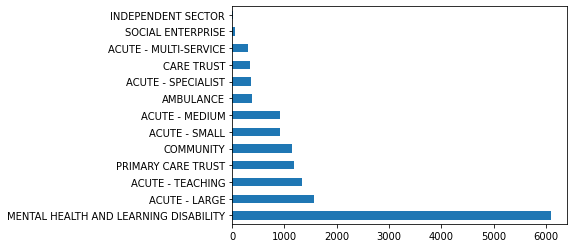

In [71]:
analysisdf['trust_type'].value_counts().plot(kind='barh')

In [72]:
##drop ambulance, independent, social enterprise, primary care
analysisdf = analysisdf[~analysisdf['trust_type'].isin(['INDEPENDENT SECTOR', 'SOCIAL ENTERPRISE', 'AMBULANCE', 'PRIMARY CARE TRUST'])]

In [73]:
analysisdf['site_type'].value_counts()

4. Mental Health (including Specialist services)    1631
GENERAL ACUTE HOSPITAL                              1282
7. Community hospital (with inpatient beds)         1138
1. General acute hospital                           1115
COMMUNITY HOSPITAL                                   893
SHORT TERM NON-ACUTE HOSPITAL                        797
LONG STAY HOSPITAL                                   666
SPECIALIST HOSPITAL                                  631
AGGREGATE SITE                                       575
Other Reportable Site                                491
Aggregate Site                                       484
MULTI-SERVICE HOSPITAL                               421
TREATMENT CENTRE                                     336
Mental Health                                        323
6. Mental Health and Learning Disabilities           258
Community hospital (with inpatient beds)             256
3. Mixed service hospital                            244
SUPPORT FACILITY               

In [74]:
###map to 20/21 definitions
###General acute hospital
###Specialist hospital (acute only)
###Mixed service hospital
###Mental Health (including Specialist services)
###Learning Disabilities
###Mental Health and  Learning Disabilities
###Community hospital (with inpatient beds)
###Other inpatient
###Non inpatient
###Support facilities

analysisdf['site_type'] = analysisdf['site_type'].replace({'4. Mental Health (including Specialist services)':'MENTAL HEALTH', 
                                                 'Mental Health':'MENTAL HEALTH',
                                                '7. Community hospital (with inpatient beds)':'COMMUNITY HOSPITAL',
                                                '1. General acute hospital':'GENERAL ACUTE HOSPITAL',
                                                'SHORT TERM NON-ACUTE HOSPITAL':'OTHER INPATIENT',
                                                'LONG STAY HOSPITAL':'OTHER INPATIENT',
                                                'SPECIALIST HOSPITAL': 'SPECIALIST ACUTE HOSPITAL',
                                                'Mental Health':'MENTAL HEALTH',
                                                '6. Mental Health and Learning Disabilities':'MENTAL HEALTH AND LD',
                                                'Ambulance services':'AMBULANCE SITE',
                                                'Community hospital (with inpatient beds)':'COMMUNITY HOSPITAL',
                                                '3. Mixed service hospital':'MIXED SERVICE HOSPITAL',
                                                'General acute hospital': 'GENERAL ACUTE HOSPITAL',
                                                '8. Other inpatient':'OTHER INPATIENT',
                                                '2. Specialist hospital (acute only)':'SPECIALIST ACUTE HOSPITAL',
                                                'NON-HOSPITAL (PATIENT)':'NON INPATIENT',
                                                      'TREATMENT CENTRE':'NON INPATIENT',
                                                      'Other Reportable Site':'SUPPORT FACILITY',   
                                                      '5. Learning Disabilities':'LEARNING DISABILITIES',
                                                      'Mixed service hospital':'MIXED SERVICE HOSPITAL',
                                                      'Other inpatient':'OTHER INPATIENT',
                                                      'Mental Health and Learning Disabilities':'MENTAL HEALTH AND LD',
                                                      'Specialist hospital (acute only)':'SPECIALIST ACUTE HOSPITAL',
                                                      'Learning Disabilities':'LEARNING DISABILITIES',
                                                      'GP PROPERTY':'PRIMARY CARE',
                                                      'HOSPICE':'OTHER INPATIENT',
                                                      'DENTAL SURGERY':'NON INPATIENT',
                                                      'Aggregate Site':'AGGREGATE SITE',
                                                      'MULTI-SERVICE HOSPITAL':'MIXED SERVICE HOSPITAL'})

In [75]:
##drop primary care, aggregate sites
analysisdf = analysisdf[~analysisdf['site_type'].isin(['AGGREGATE SITE', 'PRIMARY CARE', 'SUPPORT FACILITY'])]

<AxesSubplot:>

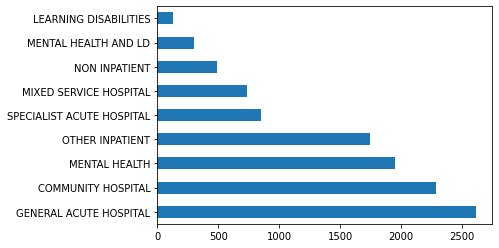

In [76]:
analysisdf['site_type'].value_counts().plot(kind='barh')

# data quality checks

In [77]:
analysisdf.describe()

,area_occupied_m2,volume_heated_m3,area_patient_m2,area_nonpatient_m2,consumed_gas_kwh,consumed_oil_kwh,consumed_coal_kwh,consumed_electricity_green_kwh,consumed_fuel_green_kwh,water_total_m3,waste_incineration_tonnes,waste_alternative_tonnes,waste_landfill_tonnes,waste_eee_tonnes,waste_recycling_tonnes,consumed_electricity_total_kwh,produced_electricity_green_kwh,waste_onsite_tonnes
count,11196.000000,11196.000000,11107.000000,11107.000000,1.035900e+04,1.035800e+04,1.035900e+04,1.035900e+04,1.035900e+04,10362.000000,9535.000000,9454.000000,9452.000000,6029.000000,9438.000000,1.035900e+04,3278.000000,2200.000000
mean,21000.257865,56198.490354,12775.261907,7489.451067,8.013620e+06,1.212953e+05,7.240677e+04,3.357138e+05,4.572726e+04,35058.213376,111.745892,154.597221,69.953137,3.440247,86.610571,2.693772e+06,5244.488408,3.832568
std,36416.179865,99914.044158,21687.266100,14597.390359,1.785188e+07,1.041142e+06,1.758056e+06,1.904623e+06,6.878966e+05,65178.433618,857.648519,5713.960809,302.948898,87.773493,339.267638,5.743677e+06,28364.895804,75.808518
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-22.940000,0.000000,0.000000,-1.039010e+07,0.000000,0.000000
25%,1671.500000,4301.000000,1213.000000,262.000000,3.635975e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1690.250000,0.210000,0.000000,0.000000,0.000000,2.200000,1.112240e+05,0.000000,0.000000
50%,4412.000000,11756.500000,3135.000000,1070.000000,1.110966e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5072.000000,3.810000,1.140000,3.415000,0.000000,9.695000,3.921310e+05,0.000000,0.000000
75%,20257.250000,53951.000000,12250.000000,6956.500000,6.130766e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,30842.750000,40.860000,23.292500,28.600000,1.000000,55.000000,1.838374e+06,0.000000,0.000000
max,292119.000000,823776.000000,157299.000000,144163.000000,4.111057e+08,3.734063e+07,6.834808e+07,5.194632e+07,1.968070e+07,705798.000000,50232.000000,554197.430000,14000.000000,4871.000000,12500.000000,5.490460e+07,716947.000000,3271.820000


In [78]:
analysisdf[analysisdf["waste_alternative_tonnes"] > 10000]

,trust_code,trust_name,trust_type,site_code,site_name,site_type,area_occupied_m2,volume_heated_m3,area_patient_m2,area_nonpatient_m2,consumed_gas_kwh,consumed_oil_kwh,consumed_coal_kwh,consumed_electricity_green_kwh,consumed_fuel_green_kwh,water_total_m3,waste_incineration_tonnes,waste_alternative_tonnes,waste_landfill_tonnes,waste_eee_tonnes,waste_recycling_tonnes,year,consumed_electricity_total_kwh,produced_electricity_green_kwh,waste_onsite_tonnes
13884,RRE,MIDLANDS PARTNERSHIP NHS FOUNDATION TRUST,MENTAL HEALTH AND LEARNING DISABILITY,RRE11,ST.GEORGES HOSPITAL,MENTAL HEALTH,19184.66,57592.0,13722.0,5578.0,4053115.0,0.0,0.0,0.0,0.0,23300.0,1575.10,14687.60,18.8,NaN,3.40,2021-01-01,1838135.0,0.0,0.0
13993,RTG,UNIVERSITY HOSPITALS OF DERBY AND BURTON NHS FOUNDATION TRUST,ACUTE - TEACHING,RTGFG,ROYAL DERBY HOSPITAL,GENERAL ACUTE HOSPITAL,182735.00,594689.0,128918.0,52943.0,35503883.0,0.0,0.0,1.0,0.0,244014.0,1001.54,554197.43,0.0,NaN,119.84,2021-01-01,33314152.0,0.0,0.0


In [79]:
analysisdf["waste_alternative_tonnes"][analysisdf["waste_alternative_tonnes"] >10000] = np.nan

In [80]:
analysisdf[analysisdf["waste_incineration_tonnes"] > 60000]

,trust_code,trust_name,trust_type,site_code,site_name,site_type,area_occupied_m2,volume_heated_m3,area_patient_m2,area_nonpatient_m2,consumed_gas_kwh,consumed_oil_kwh,consumed_coal_kwh,consumed_electricity_green_kwh,consumed_fuel_green_kwh,water_total_m3,waste_incineration_tonnes,waste_alternative_tonnes,waste_landfill_tonnes,waste_eee_tonnes,waste_recycling_tonnes,year,consumed_electricity_total_kwh,produced_electricity_green_kwh,waste_onsite_tonnes


In [81]:
analysisdf[analysisdf["waste_landfill_tonnes"] > 10000]

,trust_code,trust_name,trust_type,site_code,site_name,site_type,area_occupied_m2,volume_heated_m3,area_patient_m2,area_nonpatient_m2,consumed_gas_kwh,consumed_oil_kwh,consumed_coal_kwh,consumed_electricity_green_kwh,consumed_fuel_green_kwh,water_total_m3,waste_incineration_tonnes,waste_alternative_tonnes,waste_landfill_tonnes,waste_eee_tonnes,waste_recycling_tonnes,year,consumed_electricity_total_kwh,produced_electricity_green_kwh,waste_onsite_tonnes
12159,R1F,ISLE OF WIGHT NHS TRUST,ACUTE - MULTI-SERVICE,R1F01,ST MARY'S HOSPITAL,MIXED SERVICE HOSPITAL,61917.000,152000.0,36512.0,25405.0,13584202.0,569790.0,0.0,797441.0,0.0,62737.0,271.90,0.00,12340.3,NaN,12500.0,2020-01-01,6798310.0,0.0,0.0
13425,R1F,ISLE OF WIGHT NHS TRUST,ACUTE - MULTI-SERVICE,R1F01,ST MARY'S HOSPITAL,MIXED SERVICE HOSPITAL,61731.249,152000.0,36512.0,25135.0,17623799.0,435859.0,0.0,1370591.0,0.0,68884.0,1.99,275.46,14000.0,NaN,7780.0,2021-01-01,6685881.0,0.0,0.0


In [82]:
analysisdf["waste_landfill_tonnes"][analysisdf["waste_landfill_tonnes"] >10000] = np.nan

In [83]:
analysisdf[analysisdf["waste_recycling_tonnes"] > 15000]

,trust_code,trust_name,trust_type,site_code,site_name,site_type,area_occupied_m2,volume_heated_m3,area_patient_m2,area_nonpatient_m2,consumed_gas_kwh,consumed_oil_kwh,consumed_coal_kwh,consumed_electricity_green_kwh,consumed_fuel_green_kwh,water_total_m3,waste_incineration_tonnes,waste_alternative_tonnes,waste_landfill_tonnes,waste_eee_tonnes,waste_recycling_tonnes,year,consumed_electricity_total_kwh,produced_electricity_green_kwh,waste_onsite_tonnes


# IMPUTATION

In [84]:
analysis_by_sites = analysisdf.set_index(['site_code','year']).sort_index()

In [85]:
analysis_by_sites.isna().sum()

trust_code                           0
trust_name                           0
trust_type                           0
site_name                            0
site_type                           99
area_occupied_m2                     8
volume_heated_m3                     8
area_patient_m2                     97
area_nonpatient_m2                  97
consumed_gas_kwh                   845
consumed_oil_kwh                   846
consumed_coal_kwh                  845
consumed_electricity_green_kwh     845
consumed_fuel_green_kwh            845
water_total_m3                     842
waste_incineration_tonnes         1669
waste_alternative_tonnes          1752
waste_landfill_tonnes             1754
waste_eee_tonnes                  5175
waste_recycling_tonnes            1766
consumed_electricity_total_kwh     845
produced_electricity_green_kwh    7926
waste_onsite_tonnes               9004
dtype: int64

### recycling

In [86]:
imputed_recycling = analysis_by_sites.groupby('site_code')['waste_recycling_tonnes'].apply(lambda group: group.interpolate())

In [87]:
analysis_by_sites['waste_recycling_tonnes'] = imputed_recycling

In [88]:
filled_recycling = analysis_by_sites.groupby('site_code')['waste_recycling_tonnes'].bfill().ffill()

In [89]:
analysis_by_sites['waste_recycling_tonnes'] = filled_recycling

### incineration

In [90]:
imputed_incineration = analysis_by_sites.groupby('site_code')['waste_incineration_tonnes'].apply(lambda group: group.interpolate())

analysis_by_sites['waste_incineration_tonnes'] = imputed_incineration

filled_incineration = analysis_by_sites.groupby('site_code')['waste_incineration_tonnes'].bfill().ffill()

analysis_by_sites['waste_incineration_tonnes'] = filled_incineration

### alternative

In [91]:
imputed_alternative = analysis_by_sites.groupby('site_code')['waste_alternative_tonnes'].apply(lambda group: group.interpolate())

analysis_by_sites['waste_alternative_tonnes'] = imputed_alternative

filled_alternative = analysis_by_sites.groupby('site_code')['waste_alternative_tonnes'].bfill().ffill()

analysis_by_sites['waste_alternative_tonnes'] = filled_alternative

### landfill

In [92]:
imputed_landfill = analysis_by_sites.groupby('site_code')['waste_landfill_tonnes'].apply(lambda group: group.interpolate())

analysis_by_sites['waste_landfill_tonnes'] = imputed_landfill

filled_landfill = analysis_by_sites.groupby('site_code')['waste_landfill_tonnes'].bfill().ffill()

analysis_by_sites['waste_landfill_tonnes'] = filled_landfill

### electricity and gas

In [93]:
imputed_electricity = analysis_by_sites.groupby('site_code')['consumed_electricity_total_kwh'].apply(lambda group: group.interpolate())

analysis_by_sites['consumed_electricity_total_kwh'] = imputed_electricity

filled_electricity = analysis_by_sites.groupby('site_code')['consumed_electricity_total_kwh'].bfill().ffill()

analysis_by_sites['consumed_electricity_total_kwh'] = filled_electricity

In [94]:
imputed_gas = analysis_by_sites.groupby('site_code')['consumed_gas_kwh'].apply(lambda group: group.interpolate())

analysis_by_sites['consumed_gas_kwh'] = imputed_gas

filled_gas = analysis_by_sites.groupby('site_code')['consumed_gas_kwh'].bfill().ffill()

analysis_by_sites['consumed_gas_kwh'] = filled_gas

In [95]:
imputed_electricity_green = analysis_by_sites.groupby('site_code')['consumed_electricity_green_kwh'].apply(lambda group: group.interpolate())

analysis_by_sites['consumed_electricity_green_kwh'] = imputed_electricity_green

filled_electricity_green = analysis_by_sites.groupby('site_code')['consumed_electricity_green_kwh'].bfill().ffill()

analysis_by_sites['consumed_electricity_green_kwh'] = filled_electricity_green

In [96]:
analysis_by_sites.isna().sum()

trust_code                           0
trust_name                           0
trust_type                           0
site_name                            0
site_type                           99
area_occupied_m2                     8
volume_heated_m3                     8
area_patient_m2                     97
area_nonpatient_m2                  97
consumed_gas_kwh                     0
consumed_oil_kwh                   846
consumed_coal_kwh                  845
consumed_electricity_green_kwh       0
consumed_fuel_green_kwh            845
water_total_m3                     842
waste_incineration_tonnes            0
waste_alternative_tonnes             0
waste_landfill_tonnes                0
waste_eee_tonnes                  5175
waste_recycling_tonnes               0
consumed_electricity_total_kwh       0
produced_electricity_green_kwh    7926
waste_onsite_tonnes               9004
dtype: int64

# Generate aggregate values

In [97]:
analysis_by_sites['waste_total_tonnes'] = analysis_by_sites['waste_incineration_tonnes'] + analysis_by_sites['waste_alternative_tonnes'] + analysis_by_sites['waste_landfill_tonnes'] + analysis_by_sites['waste_recycling_tonnes']

In [98]:
analysis_by_sites['occupied_area_m2'] = analysis_by_sites['area_patient_m2'] + analysis_by_sites['area_nonpatient_m2']

In [99]:
analysis_by_sites['waste_total_index'] = analysis_by_sites['waste_total_tonnes']/analysis_by_sites['occupied_area_m2']

In [100]:
analysis_by_sites['waste_recycling_index'] = analysis_by_sites['waste_recycling_tonnes']/analysis_by_sites['occupied_area_m2']

In [101]:
analysis_by_sites['electricity_index'] = analysis_by_sites['consumed_electricity_total_kwh']/analysis_by_sites['occupied_area_m2']

analysis_by_sites['gas_index_vol'] = analysis_by_sites['consumed_gas_kwh']/analysis_by_sites['volume_heated_m3']

analysis_by_sites['electricity_green_index'] = analysis_by_sites['consumed_electricity_green_kwh']/analysis_by_sites['occupied_area_m2']

# create list of sites present in 2021 

In [102]:
sites_2021 = analysis_by_sites[analysis_by_sites.index.get_level_values('year') == '2021-01-01']
sites_2021.head(25)

,,trust_code,trust_name,trust_type,site_name,site_type,area_occupied_m2,volume_heated_m3,area_patient_m2,area_nonpatient_m2,consumed_gas_kwh,consumed_oil_kwh,consumed_coal_kwh,consumed_electricity_green_kwh,consumed_fuel_green_kwh,water_total_m3,waste_incineration_tonnes,waste_alternative_tonnes,waste_landfill_tonnes,waste_eee_tonnes,waste_recycling_tonnes,consumed_electricity_total_kwh,produced_electricity_green_kwh,waste_onsite_tonnes,waste_total_tonnes,occupied_area_m2,waste_total_index,waste_recycling_index,electricity_index,gas_index_vol,electricity_green_index
site_code,year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
REMAH,2021-01-01,REM,LIVERPOOL UNIVERSITY HOSPITALS NHS FOUNDATION TRUST,ACUTE - TEACHING,BROADGREEN HOSPITAL,GENERAL ACUTE HOSPITAL,37780.4624,73626.0,23463.0,13175.0,28954577.0,0.0,0.0,0.0,0.0,75744.0,140.26,94.74,0.00,NaN,49.44,1804225.0,0.0,0.0,284.44,36638.0,0.007764,0.001349,49.244637,393.265653,0.000000
R0A01,2021-01-01,R0A,MANCHESTER UNIVERSITY NHS FOUNDATION TRUST,ACUTE - TEACHING,ISLAND SITE,GENERAL ACUTE HOSPITAL,292119.0000,823776.0,130449.0,82333.0,81656161.0,951087.0,0.0,51946318.0,0.0,270540.0,1692.71,825.90,0.00,NaN,192.52,0.0,0.0,0.0,2711.13,212782.0,0.012741,0.000905,0.000000,99.124229,244.129287
R0A07,2021-01-01,R0A,MANCHESTER UNIVERSITY NHS FOUNDATION TRUST,ACUTE - TEACHING,WYTHENSHAWE HOSPITAL,GENERAL ACUTE HOSPITAL,123748.0200,275886.0,79165.0,45632.0,48012672.0,34528.0,0.0,11681197.0,0.0,169544.0,673.51,802.03,0.00,NaN,131.59,0.0,81631.0,0.0,1607.13,124797.0,0.012878,0.001054,0.000000,174.030839,93.601585
R0A09,2021-01-01,R0A,MANCHESTER UNIVERSITY NHS FOUNDATION TRUST,ACUTE - TEACHING,TRAFFORD GENERAL HOSPITAL,GENERAL ACUTE HOSPITAL,46818.0000,132027.0,33164.0,13654.0,14094931.0,11161.0,0.0,4883742.0,0.0,39048.0,119.30,80.46,0.00,NaN,60.45,0.0,0.0,0.0,260.21,46818.0,0.005558,0.001291,0.000000,106.757943,104.313341
R0A47,2021-01-01,R0A,MANCHESTER UNIVERSITY NHS FOUNDATION TRUST,ACUTE - TEACHING,DERMOTT MURPHY CLOSE - LONG STAY UNIT,OTHER INPATIENT,1717.0000,4636.0,1717.0,0.0,415485.0,0.0,0.0,93578.0,0.0,1741.0,10.34,14.69,0.00,NaN,1.82,0.0,0.0,0.0,26.85,1717.0,0.015638,0.001060,0.000000,89.621441,54.500874
R0A49,2021-01-01,R0A,MANCHESTER UNIVERSITY NHS FOUNDATION TRUST,ACUTE - TEACHING,BUCCLEUCH LODGE,OTHER INPATIENT,1914.0000,5168.0,1914.0,0.0,484500.0,0.0,0.0,111522.0,0.0,1668.0,7.59,4.21,0.00,NaN,0.00,0.0,0.0,0.0,11.80,1914.0,0.006165,0.000000,0.000000,93.750000,58.266458
R0B01,2021-01-01,R0B,SOUTH TYNESIDE AND SUNDERLAND NHS FOUNDATION TRUST,ACUTE - LARGE,SUNDERLAND ROYAL HOSPITAL,GENERAL ACUTE HOSPITAL,125398.0000,305451.0,96922.0,26927.0,51888460.0,333293.0,0.0,4481244.0,0.0,174354.0,331.40,318.20,0.00,NaN,329.00,0.0,0.0,0.0,978.60,123849.0,0.007902,0.002656,0.000000,169.874906,36.183126
R0B0Q,2021-01-01,R0B,SOUTH TYNESIDE AND SUNDERLAND NHS FOUNDATION TRUST,ACUTE - LARGE,SOUTH TYNESIDE DISTRICT HOSPITAL,GENERAL ACUTE HOSPITAL,53771.0000,109445.0,25712.0,19545.0,27574665.0,173267.0,0.0,1863496.0,0.0,161525.0,206.68,162.87,0.00,NaN,68.66,0.0,0.0,0.0,438.21,45257.0,0.009683,0.001517,0.000000,251.949975,41.175862
R0B0U,2021-01-01,R0B,SOUTH TYNESIDE AND SUNDERLAND NHS FOUNDATION TRUST,ACUTE - LARGE,ST BENEDICT'S HOSPICE (MONKWEARMOUTH HOSPITAL),OTHER INPATIENT,3193.0000,7703.0,1886.0,1307.0,603242.0,0.0,0.0,320961.0,0.0,1746.0,16.03,0.81,0.00,NaN,6.60,0.0,43567.0,0.0,23.44,3193.0,0.007341,0.002067,0.000000,78.312605,100.520200


In [103]:
list2021 = list(set(sites_2021.index.get_level_values('site_code')))

In [104]:
clean = analysis_by_sites.reset_index()

In [105]:
master_df = clean[clean['site_code'].isin(list2021)]

In [106]:
master_df_indexed = master_df.set_index(['trust_code','site_code','year']).sort_index()
master_df_indexed.head(200)

trust_name  \
trust_code site_code year                                                              
R0A        R0A01     2018-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
                     2019-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
                     2020-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
                     2021-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
           R0A07     2018-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
                     2019-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
                     2020-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
                     2021-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
           R0A09     2018-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
                     2019-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
                     2020-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
                     2021-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
           R0A47     2018-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
                     2019-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
                     2020-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
                     2021-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
           R0A49     2018-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
                     2019-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
                     2020-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
                     2021-01-01           MANCHESTER UNIVERSITY NHS FOUNDATION TRUST   
R0B        R0B01     2020-01-01  SOUTH TYNESIDE AND SUNDERLAND NHS FOUNDATION TRUST    
                     2021-01-01  SOUTH TYNESIDE AND SUNDERLAND NHS FOUNDATION TRUST    
           R0B0Q     2020-01-01  SOUTH TYNESIDE AND SUNDERLAND NHS FOUNDATION TRUST    
                     2021-01-01  SOUTH TYNESIDE AND SUNDERLAND NHS FOUNDATION TRUST    
           R0B0U     2020-01-01  SOUTH TYNESIDE AND SUNDERLAND NHS FOUNDATION TRUST    
                     2021-01-01  SOUTH TYNESIDE AND SUNDERLAND NHS FOUNDATION TRUST    
           R0B0X     2020-01-01  SOUTH TYNESIDE AND SUNDERLAND NHS FOUNDATION TRUST    
                     2021-01-01  SOUTH TYNESIDE AND SUNDERLAND NHS FOUNDATION TRUST    
R0D        R0D01     2021-01-01     UNIVERSITY HOSPITALS DORSET NHS FOUNDATION TRUST   
           R0D02     2021-01-01     UNIVERSITY HOSPITALS DORSET NHS FOUNDATION TRUST   
           R0D03     2021-01-01     UNIVERSITY HOSPITALS DORSET NHS FOUNDATION TRUST   
R1A        R1A1P     2012-01-01             WORCESTERSHIRE HEALTH AND CARE NHS TRUST   
                     2013-01-01             WORCESTERSHIRE HEALTH AND CARE NHS TRUST   
                     2014-01-01             WORCESTERSHIRE HEALTH AND CARE NHS TRUST   
                     2015-01-01             WORCESTERSHIRE HEALTH AND CARE NHS TRUST   
                     2016-01-01             WORCESTERSHIRE HEALTH AND CARE NHS TRUST   
                     2017-01-01             WORCESTERSHIRE HEALTH AND CARE NHS TRUST   
                     2018-01-01             WORCESTERSHIRE HEALTH AND CARE NHS TRUST   
                     2019-01-01             WORCESTERSHIRE HEALTH AND CARE NHS TRUST   
                     2020-01-01             WORCESTERSHIRE HEALTH AND CARE NHS TRUST   
                     2021-01-01             WORCESTERSHIRE HEALTH AND CARE NHS TRUST   
           R1A22     2012-01-01             WORCESTERSHIRE HEALTH AND CARE NHS TRUST   
                     2013-01-01             WORCESTERSHIRE HEALTH AND CARE NHS TRUST   
                     2014-01-01             WORCESTERSHIRE HEALTH AND CARE NHS TRUST   
                     2015-

In [107]:
master_df_indexed.to_csv('master_clean.csv')

# site type export

In [108]:
acute_sites_df =  master_df.loc[master_df['site_type'] == "GENERAL ACUTE HOSPITAL"]

acute_sites_df = acute_sites_df.set_index(['site_code','year']).sort_index()

In [109]:
acute_sites_df.to_csv('acute_sites.csv')

In [110]:
community_sites_df = master_df.loc[master_df['site_type'] == 'COMMUNITY HOSPITAL']

community_sites_df = community_sites_df.set_index(['site_code','year']).sort_index()

In [111]:
community_sites_df.to_csv('community_sites.csv')

In [112]:
mh_sites_df = master_df.loc[master_df['site_type'] == 'MENTAL HEALTH']

mh_sites_df = mh_sites_df.set_index(['site_code','year']).sort_index()

In [113]:
mh_sites_df.to_csv('mh_sites.csv')

In [114]:
spec_sites_df =  master_df.loc[master_df['site_type'] == "SPECIALIST ACUTE HOSPITAL"]

spec_sites_df = spec_sites_df.set_index(['site_code','year']).sort_index()

In [115]:
spec_sites_df.to_csv('spec_sites.csv')

In [116]:
other_sites_df =  master_df.loc[master_df['site_type'] == "OTHER INPATIENT"]

other_sites_df = other_sites_df.set_index(['site_code','year']).sort_index()

In [117]:
other_sites_df.to_csv('other_sites.csv')

In [118]:
op_sites_df =  master_df.loc[master_df['site_type'] == "NON INPATIENT"]

op_sites_df = op_sites_df.set_index(['site_code','year']).sort_index()

In [119]:
op_sites_df.to_csv('op_sites.csv')